# Project: Wrangling and Analyze Data

In [210]:
!pip install -U tweepy

Requirement already up-to-date: tweepy in /opt/conda/lib/python3.6/site-packages (4.6.0)


In [211]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import datetime
from timeit import default_timer as timer
% matplotlib inline 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [212]:
# Reading the downloaded twitter_archive_enhanced.csv file into twitter_archive_df DataFrame.

twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [213]:
# Check to see if the file was read and imported correctly  

twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [214]:
# Using the request package to download the file from the internet and store it in image-predictions.tsv.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Store the response object of the requests in a variable called response.

response = requests.get(url)

In [215]:
# Open a new file called image-predictions.tsv and write the content of the response variable to that file.

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [216]:
# Read the downloaded data into image_pred_df DataFrame

image_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [217]:
# Check to see if the file was read and imported correctly  

image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API



# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#  Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [219]:
tweet_df_list = []

# Read the tweet_json.txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r',encoding='utf-8'):
    tweet_raw_data = json.loads(line)
    
    tweet_id = tweet_raw_data['id_str']
    retweet_count = tweet_raw_data['retweet_count']
    favorite_count = tweet_raw_data['favorite_count']
    followers_count = tweet_raw_data['user']['followers_count']
    
    tweet_df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                        'followers_count': followers_count})

In [220]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_df = pd.DataFrame(tweet_df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [221]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data
In this section is about visual and programmatic assessement of  the data.



#### Visual Assesment 

###### Visual assesment of the twitter_archive_enchanced dataset

In [222]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###### Visual assesment of the image_predictions dataset

In [223]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


###### Visual assesment of the tweet_json dataset

In [224]:
tweet_df

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


#### Programmatic Assesment 

###### Programmatic assesment of the twitter_archive_enchanced dataset

In [225]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [226]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [227]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [228]:
# Check if the dataframe contains any missing values
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [229]:
twitter_archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None


In [230]:
# Set an option to display the full text without any truncation
with pd.option_context('display.max_colwidth', -1):
    
    # Ramdomly select 3 rows and check the full content for their text columns
    display(twitter_archive_df.loc[twitter_archive_df.sample(3).index, 'text'])

12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm      
1860    RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS        
Name: text, dtype: object

###### Programmatic assesment of the image_predictions dataset

In [231]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [232]:
image_pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [233]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [234]:
# Check if the dataframe contains any missing values
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [235]:
# Summary statistics of the data
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


###### Programmatic assesment of the tweet_json dataset

In [236]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [237]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count,followers_count
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018
2353,666020888022790149,532,2535,3201018


In [238]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [239]:
tweet_df.sample(3)

,tweet_id,retweet_count,favorite_count,followers_count
1836,675898130735476737,653,1774,3201002
109,871102520638267392,5764,21461,3200891
1713,680221482581123072,329,1598,3200953


In [240]:
# Check if the dataframe contains any missing values
tweet_df.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [241]:
# Summary statistics
tweet_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [242]:
# Ckeck for duplicated column names
all_columns = pd.Series(list(twitter_archive_df) + list(image_pred_df) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues


#### Twitter_archive_df table 
+ The `timestamp` columns have a datatype of `object` (string) instead of `datetime`.

+ Only want original ratings (no retweets) that have images.

+ Invalid dog names, such as "None," "a," or "an," can be found in the `name` column.

+ Missing identity information (`in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id` ).

+ Source column is in HTML-formatted string, not a normal string.


#### Image_pred_df table

+ Underscores instead of spaces in `p1, p2, p3` columns.

+ Some breed names starts with uppercase, others with lowercase in `p1, p2, p3` columns.

+ The values in `p1_conf, p2_conf, p3_conf` columns are in proportions instead of percentages.

+ The columns names `p1, p2, p3`, `p1_conf, p2_conf, p3_conf` and  `p1_dog, p2_dog, p3_dog` are not intuitive.

+ Erroneous datatype (`tweet_id`).


#### Tweet_df table
+ Erroneous datatype (`tweet_id`).

### Tidiness issues

#### Twitter_archive_df table
+ `doggo, floofer, pupper` and `puppo` columns are in a seperate columns instead of a single column. This violate the "each variable forms a column" requirement.

#### Tweet_df table
+ The columns (`retweet_count, favorite_count, followers_count`) should be added to twitter archive table.

#### Image_pred_df table
+ Image predictions table should be added to twitter archive table.

## Cleaning Data
This section contains well documented steps in cleaning all issues indentified while assessing.


Make a copy of the original data before cleaning. 

In [243]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()

image_pred_df_clean = image_pred_df.copy()

tweet_df_clean = tweet_df.copy()

### Issue #1: Correcting timestamp column datatype

#### Define:
The retweeted_status_timestamp is to be dropped.

Convert the data type of timestamp column in the twitter_archive_df_clean table from string to datetime 


#### Code

In [244]:
twitter_archive_df_clean['timestamp'] = twitter_archive_df_clean['timestamp'].str.slice(start=0, stop=-6)

In [245]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'], format= "%Y-%m-%d %H:%M:%S")

#### Test

In [246]:
twitter_archive_df_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [247]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: Only original ratings (no retweets)

#### Define

Remove retweets observations from the table by ingoring rows with values for 'retweeted_status_id' and 'in_reply_to_status_id'. This is.na() is utilized to perform such task

#### Code

In [248]:
twitter_archive_df_clean = twitter_archive_df_clean[(twitter_archive_df_clean['retweeted_status_id'].isna() == True) & (twitter_archive_df_clean['in_reply_to_status_id'].isna() == True)] 

#### Test

In [249]:
# Checking for confirmation
twitter_archive_df_clean['retweeted_status_id'].notna().sum()

0

In [250]:
twitter_archive_df_clean['in_reply_to_status_id'].notna().sum()

0

### Issue #3: Correcting invalid dog names

#### Define

Replace all the invalid names in the name column of the twitter_archive_df_clean with 'None'

#### Code

In [251]:
# Replace all the invalid names in the name column of the twitter_archive_df_clean with 'None'
twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].str.replace('^[a-z]+','None')

#### Test

In [252]:
twitter_archive_df_clean['name'].value_counts()

None       707
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Lola         8
Winston      8
Daisy        7
Toby         7
Koda         6
Bailey       6
Stanley      6
Oscar        6
Jax          6
Bella        6
Bo           6
Dave         5
Bentley      5
Chester      5
Leo          5
Buddy        5
Rusty        5
Milo         5
Scout        5
Louis        5
Jerry        4
Bear         4
          ... 
Lambeau      1
Bode         1
Erik         1
Levi         1
Kramer       1
Stormy       1
Zooey        1
Rose         1
Chelsea      1
Banditt      1
Rizzy        1
Clarkus      1
Randall      1
Asher        1
Berb         1
Fynn         1
Brutus       1
Sky          1
Bungalo      1
Jeremy       1
Scott        1
Chaz         1
Kody         1
Stefan       1
Trevith      1
Ambrose      1
Tuco         1
Harry        1
Milky        1
Samsom       1
Name: name, Length: 930, dtype: int64

In [253]:
twitter_archive_df_clean['name'].sample(5)

2235     None
1029    Percy
269      None
1254     None
820        Al
Name: name, dtype: object

### Issue #4: Missing identity information

#### Define

Since most of the values in the 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' columns are missing, all those columns will be dropped.

In [254]:
twitter_archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1, inplace=True)

#### Test

In [255]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #5: Extracting source of tweet from HTML

#### Define

Extract source from the HTML tag

#### Code

In [256]:
twitter_archive_df_clean['source'] = twitter_archive_df_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [257]:
twitter_archive_df_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Replacing underscores with space

#### Define

Replace all underscores in the p1, p2, p3 columns with space instead

#### Code


In [258]:
# Get all the three columns and replace all underscores with space
image_pred_df_clean['p1'] = image_pred_df_clean['p1'].str.replace('_', ' ')
image_pred_df_clean['p2'] = image_pred_df_clean['p2'].str.replace('_', ' ')
image_pred_df_clean['p3'] = image_pred_df_clean['p3'].str.replace('_', ' ')

#### Test

In [259]:
# Confirm changes
image_pred_df_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Issue #7: Addressing inconsistent naming cases

#### Define

Convert all the values in the p1, p2, p3 to title case. This will capitalize the first letter of each word

#### Code

In [260]:
# Get all the three columns and convert their values to title case
image_pred_df_clean['p1'] = image_pred_df_clean['p1'].str.title()
image_pred_df_clean['p2'] = image_pred_df_clean['p2'].str.title()
image_pred_df_clean['p3'] = image_pred_df_clean['p3'].str.title()

#### Test

In [261]:
# Check for confirmation
image_pred_df_clean[['p1','p2','p3']].sample(5)

,p1,p2,p3
1282,Border Collie,Collie,Papillon
692,Soft-Coated Wheaten Terrier,Cocker Spaniel,Teddy
1412,Bernese Mountain Dog,Greater Swiss Mountain Dog,Entlebucher
407,Chihuahua,Siamese Cat,Kelpie
1468,Cocker Spaniel,Labrador Retriever,Chihuahua


### Issue #8: Proportions to percentages

#### Define



Loop through all the columns (`p1_conf, p2_conf, p3_conf`) and convert each proportion to a percentage using the **apply** and **lambda** functions.

#### Code

In [262]:
# Get all the three columns and convert their values from proportions to percentages
image_pred_df_clean['p1_conf'] = image_pred_df_clean['p1_conf'].apply(lambda x: round(x*100, 2))
image_pred_df_clean['p2_conf'] = image_pred_df_clean['p2_conf'].apply(lambda x: round(x*100, 2))
image_pred_df_clean['p3_conf'] = image_pred_df_clean['p3_conf'].apply(lambda x: round(x*100, 2))

#### Test

In [263]:
# Check for confirmation
image_pred_df_clean[['p1_conf','p2_conf','p3_conf']].sample(5)

,p1_conf,p2_conf,p3_conf
223,38.03,34.28,15.62
1206,11.24,7.14,6.25
322,87.56,3.22,1.72
973,71.76,15.14,4.71
503,78.58,11.82,4.36


In [264]:
image_pred_df_clean[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2075.000000
mean,59.454954,13.458877,6.032328
std,27.117357,10.066692,5.090477
min,4.430000,0.000000,0.000000
25%,36.440000,5.390000,1.620000
50%,58.820000,11.820000,4.940000
75%,84.385000,19.560000,9.180000
max,100.000000,48.800000,27.340000


### Issue #9: Renaming columns for better reading 

#### Define



Rename the columns  `p1, p2, p3`, `p1_conf, p2_conf, p3_conf` and  `p1_dog, p2_dog, p3_dog` to make them intuitive and meaningful.

#### Code


In [265]:
image_pred_df_clean = image_pred_df_clean.rename(columns={'p1':'prediction_1','p2':'prediction_2','p3':'prediction_3','p1_conf':'confidence_percent_1','p2_conf':'confidence_percent_2','p3_conf':'confidence_percent_3','p1_dog':'breed_prediction_1','p2_dog':'breed_prediction_2','p3_dog':'breed_prediction_3'})

#### Test

In [266]:
image_pred_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_percent_1,breed_prediction_1,prediction_2,confidence_percent_2,breed_prediction_2,prediction_3,confidence_percent_3,breed_prediction_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### Issue #10: Erroneous datatype

#### Define

Convert the tweet_id column in the twitter_archive_df_clean table from integer to string

#### Code

In [267]:
# Change tweet_id from integer to string 
twitter_archive_df_clean['tweet_id'] = twitter_archive_df_clean['tweet_id'].astype(str)

In [268]:
# Confirm changes
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue #11: Erroneous datatype

#### Define

Convert the tweet_id column in the tweet_df_clean table from integer to string

#### Code

In [269]:
# Change tweet_id from integer to string 
tweet_df_clean['tweet_id'] = twitter_archive_df_clean['tweet_id'].astype(str)

#### Test

In [270]:
# Confirm changes
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2095 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Issue #1: Dog stages in a single column

#### Define

Replace all the None in all the 4 columns with np.NaN.


Define a function and call it to replace them.


Concatenate all the 4 columns to 1 column named dog stage.


Rows with multiple dog_stage values combined like doggopupper, doggofloofer and doggopuppo needs to separated.

Drop the original four columns from the dataset.

#### Code

In [271]:
def replace_none(stage): 
    for stage_type in range(0, len(stage)):
        # Replace all the None with np.NaN
        twitter_archive_df_clean[stage[stage_type]].replace('None', '', inplace=True)
        twitter_archive_df_clean[stage[stage_type]].replace(np.NaN, '', inplace=True)         

In [272]:
# list of dog stages
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']

# Make a function call to replace them
replace_none(dog_stage_list)

In [273]:
# Concatenate all the 4 columns to 1 column named dog stage
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['doggo'] + twitter_archive_df_clean['floofer'] + twitter_archive_df_clean['pupper'] + twitter_archive_df_clean['puppo']

In [274]:
# Replace empty strings with None
twitter_archive_df_clean['dog_stage'].replace('', 'None', inplace=True)

In [275]:
twitter_archive_df_clean['dog_stage'].value_counts()

None            1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [276]:
# Rows with multiple dog_stage values combined like doggopupper, doggofloofer and doggopuppo needs to separated
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['dog_stage'].str.replace('doggopuppo', 'doggo,puppo')
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['dog_stage'].str.replace('doggofloofer', 'doggo,floofer')
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['dog_stage'].str.replace('doggopupper', 'doggo,pupper')

# Drop the original four columns from the dataset
twitter_archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [277]:
# Check for duplicates in the dataset
twitter_archive_df_clean.duplicated().sum()

0

#### Test

In [278]:
# Confirm changes and verify if all 4 original columns have been removed
assert twitter_archive_df_clean.columns.all() not in dog_stage_list

In [279]:
# Counts the total number of dogs that belong to each stage
twitter_archive_df_clean['dog_stage'].value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [280]:
# Confirm that there's no duplicates
twitter_archive_df_clean.duplicated().sum()

0

### Issue #2: Merging the  tweet_df_clean table with the twitter_archive_df_clean table

#### Define 

Lets add the tweet_df_clean table to the twitter_archive_df_clean table.

#### Code

In [281]:
# Add the tweet_df_clean table to the twitter_archive_df_clean table
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, tweet_df_clean, on='tweet_id', how='left')

#### Test


In [282]:
# Confirm changes
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
retweet_count         2095 non-null float64
favorite_count        2095 non-null float64
followers_count       2095 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 213.0+ KB


In [283]:
# Inspect the first 5 rows
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853.0,39467.0,3200889.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514.0,33819.0,3200889.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328.0,25461.0,3200889.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964.0,42908.0,3200889.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774.0,41048.0,3200889.0


### Issue #3: Merging the image_pred_df_clean table with the twitter_archive_df_clean table

### Define

Lets add the  image_pred_df_clean table to the twitter_archive_df_clean table.

#### Code

In [284]:
# Convert tweet_id from integer to string 
image_pred_df_clean['tweet_id'] =  image_pred_df_clean['tweet_id'].astype(str)

# Add the image_pred_df_clean table to the twitter_archive_df_clean table
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, image_pred_df_clean, on='tweet_id', how='left')

#### Test

In [285]:
# Confirm changes
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id                2097 non-null object
timestamp               2097 non-null datetime64[ns]
source                  2097 non-null object
text                    2097 non-null object
expanded_urls           2094 non-null object
rating_numerator        2097 non-null int64
rating_denominator      2097 non-null int64
name                    2097 non-null object
dog_stage               2097 non-null object
retweet_count           2095 non-null float64
favorite_count          2095 non-null float64
followers_count         2095 non-null float64
jpg_url                 1971 non-null object
img_num                 1971 non-null float64
prediction_1            1971 non-null object
confidence_percent_1    1971 non-null float64
breed_prediction_1      1971 non-null object
prediction_2            1971 non-null object
confidence_percent_2    1971 non-null float64
breed_prediction_2      19

In [286]:
# Inspect the first 5 rows
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,prediction_1,confidence_percent_1,breed_prediction_1,prediction_2,confidence_percent_2,breed_prediction_2,prediction_3,confidence_percent_3,breed_prediction_3
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853.0,...,1.0,Orange,9.70,False,Bagel,8.59,False,Banana,7.61,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514.0,...,1.0,Chihuahua,32.36,True,Pekinese,9.06,True,Papillon,6.90,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328.0,...,1.0,Chihuahua,71.60,True,Malamute,7.83,True,Kelpie,3.14,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964.0,...,1.0,Paper Towel,17.03,False,Labrador Retriever,16.81,True,Spatula,4.08,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774.0,...,2.0,Basset,55.57,True,English Springer,22.58,True,German Short-Haired Pointer,17.52,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [287]:
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [288]:
twitter_data = pd.read_csv('twitter_archive_master.csv')

In [289]:
twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,prediction_1,confidence_percent_1,breed_prediction_1,prediction_2,confidence_percent_2,breed_prediction_2,prediction_3,confidence_percent_3,breed_prediction_3
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853.0,...,1.0,Orange,9.70,False,Bagel,8.59,False,Banana,7.61,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514.0,...,1.0,Chihuahua,32.36,True,Pekinese,9.06,True,Papillon,6.90,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328.0,...,1.0,Chihuahua,71.60,True,Malamute,7.83,True,Kelpie,3.14,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964.0,...,1.0,Paper Towel,17.03,False,Labrador Retriever,16.81,True,Spatula,4.08,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774.0,...,2.0,Basset,55.57,True,English Springer,22.58,True,German Short-Haired Pointer,17.52,True


In [290]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id                2097 non-null int64
timestamp               2097 non-null object
source                  2097 non-null object
text                    2097 non-null object
expanded_urls           2094 non-null object
rating_numerator        2097 non-null int64
rating_denominator      2097 non-null int64
name                    2097 non-null object
dog_stage               2097 non-null object
retweet_count           2095 non-null float64
favorite_count          2095 non-null float64
followers_count         2095 non-null float64
jpg_url                 1971 non-null object
img_num                 1971 non-null float64
prediction_1            1971 non-null object
confidence_percent_1    1971 non-null float64
breed_prediction_1      1971 non-null object
prediction_2            1971 non-null object
confidence_percent_2    1971 non-null float64
breed_prediction_2      1971 non-nu

In [291]:
# Checking for duplicates in the master dataset
twitter_data.duplicated().sum()

0

In [292]:
# Summary Statistics
twitter_data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,confidence_percent_1,confidence_percent_2,confidence_percent_3
count,2.097000e+03,2097.000000,2097.000000,2095.000000,2095.000000,2.095000e+03,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.365594e+17,12.189318,10.448736,3033.846778,7701.555131,3.200945e+06,1.201928,59.455885,13.458513,6.016464
std,6.710178e+16,40.364996,6.645061,5306.376476,11867.595606,4.415728e+01,0.559020,27.212636,10.105391,5.094043
min,6.660209e+17,0.000000,2.000000,2.000000,0.000000,3.200799e+06,1.000000,4.430000,0.000000,0.000000
25%,6.768197e+17,10.000000,10.000000,602.000000,1385.500000,3.200901e+06,1.000000,36.310000,5.340000,1.610000
50%,7.098528e+17,11.000000,10.000000,1336.000000,3397.000000,3.200947e+06,1.000000,58.780000,11.740000,4.940000
75%,7.877176e+17,12.000000,10.000000,3441.500000,8868.000000,3.201001e+06,1.000000,84.785000,19.560000,9.155000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,3.201018e+06,4.000000,100.000000,48.800000,27.340000


### Insights:
1. Explore the relationship between Favorite Count and Retweet Count.


2. Trend analysis of tweets from November, 2015 to August, 2017.


3. What are the most tweeted dog names?

### Visualization

### Explore the relationship between Favorite Count and Retweet Count

In [293]:
# Examine the correlation between the two variables
twitter_data[['favorite_count', 'retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.715867
retweet_count,0.715867,1.000000


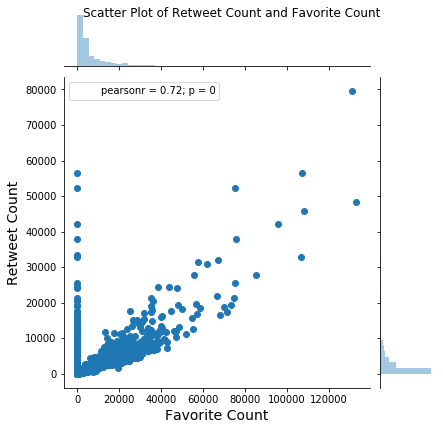

In [294]:
# Ploting the graph
plot = sns.jointplot(x='favorite_count',y='retweet_count', data=twitter_data,kind='scatter');

# Setting the title of the plot
plot.fig.suptitle("Scatter Plot of Retweet Count and Favorite Count");

# Setting the axis of the plot
plot.set_axis_labels('Favorite Count', 'Retweet Count', fontsize=14);

# Save the plot
plt.savefig('corr_plot.jpg')

According to the graph plotted above, there is a high positive correlation between retweet count and favorite count with a pearsonr coefficient of 0.72. This indicates that on the average, when favorite counts increases, retweet counts also increases.

### Trend analysis of tweets from November, 2015 to August, 2017

In [295]:
# Convert the timestamp column to a datetime data type
twitter_data['timestamp'] = pd.to_datetime(twitter_data['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Group the dataset by the timestamp column and generate frequency
monthly_tweets = twitter_data.groupby(pd.Grouper(key='timestamp', freq='M')).count().reset_index()

# Select only the timestamp and the tweet_id colum
monthly_tweets = monthly_tweets[['tweet_id','timestamp']]

# View the first 5 rows
monthly_tweets.head()

,tweet_id,timestamp
0,296,2015-11-30
1,372,2015-12-31
2,183,2016-01-31
3,121,2016-02-29
4,132,2016-03-31


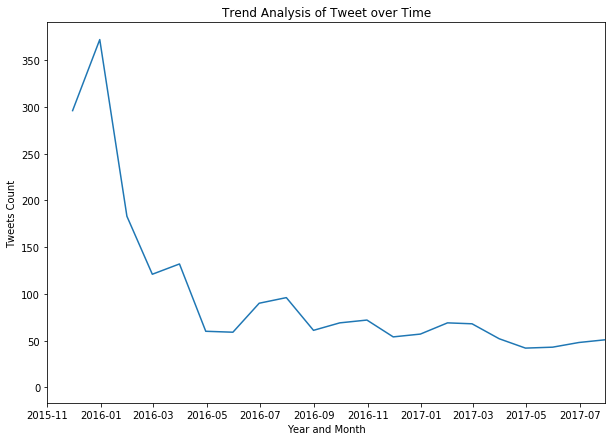

In [296]:
# Ploting the trend analysis of the tweets

plt.figure(figsize=[10,7])

# WeRateDogs Started on November 2015 and the data used ends August 2017
# This is used to generate the range of the x axis
plt.xlim([datetime.date(2015, 11, 1), datetime.date(2017, 7, 30)])

# Ploting Timestamp against Tweet_id
plt.plot(monthly_tweets['timestamp'], monthly_tweets['tweet_id']);

# x axis label
plt.xlabel('Year and Month')

# y axis label
plt.ylabel('Tweets Count')

# Plot Title
plt.title('Trend Analysis of Tweet over Time')

# Save the plot
plt.savefig('trend_plot.jpg')

From November 2015 to August 2017, the trend of tweets is depicted in the graph above.

From early 2016 to the end of August 2017, a declining trend in tweet volume may be seen. After a significant increase from November 2015 to January 2016, tweet volume quickly dropped, and since then, it has generally declined.

### The most tweeted dog names

In [297]:
# Get the data for only the dog names predicted
twitter_data = twitter_data[twitter_data['name'] != 'None'] 

# Get the Top 10 unique dog names
top_10 = twitter_data['name'].value_counts().nlargest(10)

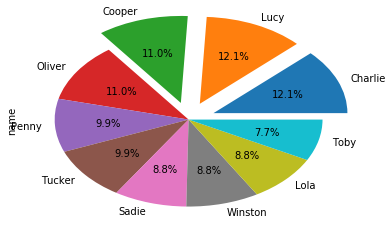

In [298]:
# Plot a pie chart
top_10.plot(kind='pie', autopct='%1.1f%%', explode=[0.2,0.2,0.2,0,0,0,0,0,0,0]);

# Save the plot
plt.savefig('pie_chart_plot.jpg')

According to the pie chart above, the most tweeted dog names are **Charlie** and **Lucy**, tightly followed by **Cooper** and **Oliver**. The least tweeted dog name is **Toby**.

### Resources


+ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

+ https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

In [301]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0